Это вторая часть задания.

Первая часть задания (задания 3.1-3.4) находится в [ноутбуке про линейную регрессию, который разбирали на лекции](https://colab.research.google.com/drive/1eX21oBHRAzNr3PimxhMJENF3yeBC2DBe?usp=sharing).

# Предсказание цен на недвижимость

Компании по продаже недвижимости оценивают её стоимость, используя методы машинного обучения. 
Задача оценки цены на недвижимость также может быть нужна для выявления наиболее выгодных предложений, или, например, для выявления аномально низких цен на объект недвижимости.

**Постановка задачи анализа данных** 

Целью данной задачи является прогнозирование стоимости домов в округе Кинг (штат Вашингтон, США) с помощью построения регрессионных моделей и их анализа. Набор данных состоит из цен на дома в округе Кинг, проданных в период с мая 2014 года по май 2015 года. Данные опубликованы в открытом доступе на платформе Kaggle. 

Данные с сайта renthub.com по стоимости квартир для аренды:

<a href="https://drive.google.com/uc?id=1Dr-p-o5yMi3uIS2kPcUUwT5bH0cCt1Be
" target="_blank"><img src="https://drive.google.com/uc?id=1Dr-p-o5yMi3uIS2kPcUUwT5bH0cCt1Be" 
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>


**Обзор доступных данных**

В наборе данных 21613 наблюдений и 16 признаков. 
Таким образом, про каждый из 21613 объектов недвижимости мы знаем значения 16 характеристик (число спален, оценка состояния риелтором, наличие вида на воду и т.п.)

Выборка была разбита на две части для обучения и для тестирования модели. Данные на обучение и тест обычно делят случайно и равномерно: нужно чтобы и обучающая, и тестовая выборка были похожие на те данные, на которых модель будет использоваться в боевых условиях. 

Более сложные разбиения могут использоваться если в данных есть временная компонента - например, мы строим скоринговую модель и для теста откладываем данные за последние несколько месяцев, а всю остальную выборку используем для обучения. Такое разбиение имитирует реальную работу модели: мы можем обучаться только на данных прошлых кредитов, а работать модель уже будет на данных из будущего. 

Доли общей выборки для обучения и тестирования обычно 70% и 30% соотвественно. Любые разумные числа подходят, если для обучения используется достаточно много данных (обычно больше 50%), но и для тестирования что-то остается (10% и больше).


Данные содержат два типа переменных:

* Целевая: **Целевая. Цена**
* Остальные переменные **могут использоваться для прогноза целевой переменной.**

## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке
  6. Проанализировать важность признаков и не забыть про постановку задачи

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки** 

Библиотека **warnings** отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю. 
FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях.
Поэтому такие предупреждения мы будем игнорировать.
Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'.
Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных. 

In [ ]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах. 

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифмический
* hist() - гистограммы

In [ ]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке 
%matplotlib inline 

**Шаг 1.2. Загрузим данные**

Для решения задачи мы будем использовать данные. Они состоят из двух частей: часть для обучения и часть для тестирования модели. Загружаем данные с помощие команды !wget. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду %%capture в первой строке.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название таблицы с данными.

In [ ]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx') # загружаем таблицу в переменную training_data

*Что важно посмотреть после того, как мы загрузили данные?*
- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *training_data* метод **head()**, который выводит первые 5 строк таблицы. 

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [ ]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


**Шаг 1.3. Посмотрим на размеры загруженной таблицы**, у которой мы видели только первые 5 строк.

Для этого вызываем поле **shape** у нашей переменной *training_data*. Поле вызывается также как метод, но в конце скобки не ставятся, так как для поля не предусмотрена передача аргументов.  

In [ ]:
training_data.shape

(15129, 16)

*Что означает первое и второе число?*

Итак, таблица содержит 15129 строк (объектов) и 16 столбцов (признаков), включая выходной (целевой) признак.
15129 меньше 21613, так как мы пока загрузили только часть данных, которую будем использовать для обучения модели.

Таблицу проверили, теперь можно приступать к обработке данных.

# 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

Анализируем результата выполнения команды:

* 15129 строк (entries)
* 16 столбцов (Data columns)

В данных присутствует всего два типа dtypes:
* int64 - целое число  (12 столбцов)
* float64 - дробное число (4 столбца)

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Так как эти цифры в каждой строчке совпадают с числом строк (15129), то в данных нет пропусков и можно двигаться дальше. 

**Шаг 2.2. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать стоимость, поэтому целевая переменная - это цена. 

In [ ]:
target_variable_name = 'Целевая.Цена'

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *training_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [ ]:
training_values = training_data[target_variable_name]

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. 
Для это нужно у переменной *training_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *training_points*. После выполнения запроса *training_points* будет содержать исходную таблицу без целевого столбца. 

Обратите внимание, что в данном случае мы передаем два аргумента:
    1. target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
    2. axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [ ]:
training_points = training_data.drop(target_variable_name, axis=1)

Можно посмотреть результаты этих действий, вызвав метод **head()** и поле **shape**, которыми мы пользовались ранее, но сейчас нужно вызывать их от новой переменной *training_points*.

In [ ]:
training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [ ]:
training_points.shape

(15129, 15)

Видно, что столбца действительно нет, а количество строк не изменилось. Данные в 5 первых строках такие же, как были ранее.

##   3. Обучить модель на обучающей выборке

**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов. 

На выбор метода для построения модели влияет набор признаков, размер выборки, интуиция про то, какая связь между входными переменными и целевой. Но часто решение принимается исходя из того, какая модель сработала лучше.

Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

Импортируем модуль из этой библиотеки:
 * *linear_model* - тут находятся все линейные модели

In [ ]:
from sklearn import linear_model

Чтобы создать модель линейной регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

In [ ]:
linear_regression_model = linear_model.LinearRegression() # создаем модель

In [ ]:
linear_regression_model # смотрим, что получилось

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Шаг 3.2. Обучить модель**

Теперь, когда мы создали прототип модели, можем её обучить на обучающей выборке. 

Для этого вызываем метод **fit()** и передаем ему на вход два аргумента: 
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [ ]:
linear_regression_model.fit(training_points, training_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Задание 3.5

Реализуйте настройку параметров модели не с помощью встроенной функции, а с помощью своей реализации.

Настроить параметры нужно с помощью **стохастического градиентного спуска**. 
В качестве дополнительного задания можно использовать регуляризацию **Elastic Net**. 

In [ ]:
import numpy as np
# https://towardsdatascience.com/only-numpy-implementing-different-combination-of-l1-norm-l2-norm-l1-regularization-and-14b01a9773b


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy.linalg  as LA
import matplotlib.pyplot as plt
from scipy.special import comb
import numpy as np

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

class PolyRegression:

  def __init__(self,degrees, include_bias = True, stat_type = False):
    self.degrees = degrees
    self.include_bias = include_bias
    self.stat_type = stat_type
    self.w = None
    self.b = None
  
  @staticmethod
  def _grad(X, y,pr, w,elent):

    # w_grad = np.zeros((X.shape[1], 1))
    # b_grad = 0

    bs = X.shape[0]

    w_grad = 2*np.dot(X.T,(pr - y)) + elent[0]*np.sign(w) + 2*elent[1]*w
    b_grad = 2*np.sum((pr - y))

    return w_grad/bs, b_grad/bs

  def fit(self, X, y, epochs = 5, bs = 25, lr = 1e-03, elnet = (0,0)):
    
    X = self.transform(X)
    y = y.reshape(X.shape[0],1)
    print(X.shape)

    if self.stat_type:
      assert X.ndim > 1 and y.ndim > 1  and X.ndim == y.ndim
      self.w = np.dot(np.dot(LA.inv(np.dot(np.transpose(X,(1,0)), X)), np.transpose(X,(1,0))), y)
      self.b = y.mean() - self.w * X.mean()
      return self.w, self.b
    

    self.w = np.zeros((X.shape[1], 1,))
    self.b = 0

    losses = []
    for _ in range(epochs):
      for i in range((X.shape[0] - 1)//bs + 1):
        #SGD optim

        xb = X[i*bs: (i+1)*bs,:]
        yb = y[i*bs: (i+1)*bs,:]
    
        predict = xb.dot(self.w) + self.b
        
        w_grad, b_grad = self._grad(xb.copy(), yb.copy(), predict.copy(), self.w.copy(), elnet)
        
        self.w -= lr * w_grad
        self.b -= lr * b_grad

      loss = self.MSEloss(np.dot(xb, self.w)+self.b, yb) #
      # print(loss)
      losses.append(loss)
    return self.w, self.b, losses
  
  def predict(self,X):
    x = self.transform(X)
    if self.stat_type:
      return np.dot(x,self.w)
    else:
      return np.dot(x, self.w) + self.b

  def MSEloss(self,pr, tg):
    tg = tg.reshape(-1)
    pr = pr.reshape(-1)
    return np.average(((tg - pr)**2), axis=0)


  @staticmethod
  def _num_combinations(n_features, max_degree, include_bias):
    combinations = comb(n_features+ max_degree, max_degree,exact = True) -1 #биноминальный коэффицент
    if include_bias:
      combinations += 1
    return combinations

  @property
  def coef_(self):
    return np.transpose(self.w,(1,0))

  def transform(self,X,):

    n_samples, n_features = X.shape[0], X.shape[1] # количество признаков

    _n_out_full = self._num_combinations(
            n_features=n_features,
            max_degree=self.degrees,
            include_bias=self.include_bias,
        )
    XP = np.empty(shape = (n_samples, _n_out_full), dtype = X.dtype)

    if self.include_bias:
      XP[:,0] = 1
      curr_col = 1
    else:
      curr_col = 0

    XP[:,curr_col: curr_col + n_features] = X
    indexs = list(range(curr_col, curr_col + n_features))
    curr_col += n_features # 2
    indexs.append(curr_col)

    for _ in range(2, self.degrees+1):
      new_index = []
      end = indexs[-1] # 3
      for features_idx in range(n_features):
        start = indexs[features_idx]
        new_index.append(curr_col)
        next_col = curr_col + end - start
        if next_col <= curr_col:
          break
        np.multiply(XP[:,start:end],
                    X[:,features_idx:features_idx + 1],
                    out = XP[:,curr_col:next_col],
                    casting = "no",
                    )
        curr_col = next_col # 3

      new_index.append(curr_col) #2 ,3
      indexs = new_index
    return XP
  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_points, training_values, shuffle = False)

В табличке много слабо коррелирующих данных из-за этого SGD загоняется в минимум и дает ужс, поэтому сразу возьмем только коррелирующие признаки путем статистического обучения.

In [ ]:
model = PolyRegression(1,include_bias=False, stat_type=True)
model.fit(X_train.to_numpy(),y_train.to_numpy())

(11346, 15)


(array([[-2.36861745e+06],
        [ 4.25485079e+06],
        [ 2.76193048e+04],
        [-5.07710097e-01],
        [-3.63533924e+05],
        [ 1.82782368e+06],
        [-1.58966484e+04],
        [ 1.42115677e+05],
        [ 1.02748664e+05],
        [-2.81933715e+04],
        [-2.80607698e+04],
        [-3.20634650e+03],
        [ 1.37001929e+01],
        [ 5.00036654e+05],
        [ 1.48963158e+05]]), array([[ 3.26395876e+09],
        [-5.86168458e+09],
        [-3.75143009e+07],
        [ 5.39562942e+05],
        [ 5.01406508e+08],
        [-2.51778936e+09],
        [ 2.24408548e+07],
        [-1.95264443e+08],
        [-1.41025590e+08],
        [ 3.93829620e+07],
        [ 3.92002667e+07],
        [ 4.95648477e+06],
        [ 5.19987660e+05],
        [-6.88398713e+08],
        [-2.04698726e+08]]))

In [ ]:
name_coef = []
for name, coef in zip(X_train.columns, model.coef_.reshape(-1)):
  name_coef.append((abs(coef),name))
name_coef.sort()
print(name_coef)

[(0.5077100970175897, 'Общая площадь'), (13.700192896173483, 'Год реновации'), (3206.3465010054897, 'Год постройки'), (15896.648447258527, 'Просмотрены ранее'), (27619.304838121618, 'Жилая площадь'), (28060.769769226452, 'Площадь подвала'), (28193.37154999414, 'Площадь без подвала'), (102748.66393571785, 'Оценка риелтора'), (142115.67685546042, 'Состояние'), (148963.1582351071, 'Долгота'), (363533.9240538184, 'Количество этажей'), (500036.6536630897, 'Широта'), (1827823.6839621963, 'Вид на воду'), (2368617.4497196223, 'Спальни'), (4254850.792493757, 'Ванные')]


In [ ]:
n_f = 3 # количество важных признаков
imp_cols = name_coef[:len(name_coef) - n_f]
names = [name for _, name in imp_cols]

X_train = X_train.drop(columns=names)
X_train

,Спальни,Ванные,Вид на воду
0,5,3.50,0
1,4,1.75,0
2,6,2.75,0
3,3,1.75,0
4,3,2.75,0
...,...,...,...
11341,2,2.00,0
11342,4,2.25,0
11343,4,1.50,0
11344,4,2.50,0


In [ ]:
model = PolyRegression(1,include_bias=True)
temp = model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs = 5000, bs = 1000, lr = 1e-03, elnet = (1e-05, 1e-02))
pr = model.predict(X_train.to_numpy())

(11346, 4)


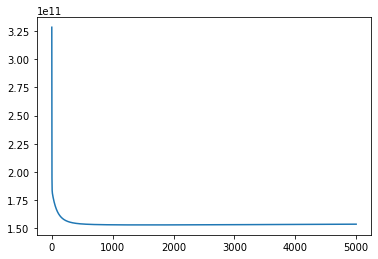

In [ ]:
plt.plot(range(len(temp[-1])),temp[-1])

In [ ]:
mean_squared_error(pr,y_train.to_numpy())

88256015737.1769

## 4. Загрузить и предобработать данные для тестирования

**Шаг 4.1. Загрузим и проанализируем тестовые данные.**

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название файла, в котором находится таблица с данными.

In [ ]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

*Что важно посмотреть, после того, как мы загрузили данные?*

- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *test_data* метод **head()**, который выводит первые 5 строк таблицы. 

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [ ]:
test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


Посмотрим на размеры загруженной таблицы, так как мы видели только 5 строк

Для этого вызываем поле **shape** у нашей переменной *test_data*. Поле вызывается также как метод, но в конце скобки не ставятся (!), так как для поля не предусмотрена передача аргументов.  

In [ ]:
test_data.shape

(6484, 16)

*Что означает первое и второе число?* 
Таблица содержит 6484 строк (объектов) и 16 столбцов (признаков), включая выходной (целевой) признак. Также как в учебных данных до обучения.

Таблицу проверили, теперь можно приступать к обработке данных
Действуем аналогично тому, как делали с данными для обучения

Проверим, есть ли в данных пропуски. Для того чтобы это сделать, нужно обратиться вызвать у переменной *test_data* метод **info()**.

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Спальни              6484 non-null   int64  
 2   Ванные               6484 non-null   float64
 3   Жилая площадь        6484 non-null   int64  
 4   Общая площадь        6484 non-null   int64  
 5   Количество этажей    6484 non-null   float64
 6   Вид на воду          6484 non-null   int64  
 7   Просмотрены ранее    6484 non-null   int64  
 8   Состояние            6484 non-null   int64  
 9   Оценка риелтора      6484 non-null   int64  
 10  Площадь без подвала  6484 non-null   int64  
 11  Площадь подвала      6484 non-null   int64  
 12  Год постройки        6484 non-null   int64  
 13  Год реновации        6484 non-null   int64  
 14  Широта               6484 non-null   float64
 15  Долгота              6484 non-null   f

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Так как эти цифры в каждой строчке совпадают с числом строк (6484), то в данных нет пропусков.

**Шаг 4.2. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *test_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [ ]:
test_values = test_data[target_variable_name]

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. 
Для это нужно у переменной *test_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *test_points*. После выполнения запроса *test_points* будет содержать исходную таблицу без целевого столбца. 

Обратите внимание, что в данном случае мы передаем два аргумента:
    1. target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
    2. axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [ ]:
test_points = test_data.drop(target_variable_name, axis=1)

И проверяем результат записанный в test_points

In [ ]:
test_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [ ]:
test_points.shape

(6484, 15)

Видно, что количество столбцов уменьшилось на один. Данные в 5 первых строках такие же, как были ранее.

# 5. Провалидировать модель на тестовой выборке

**Шаг 5.1. Сравнение моделей.**

Теперь мы готовы сравнить качество двух моделей! 😎

## Задание 3.6 Какая модель лучше?

Получим прогнозы целевой переменной на тестовых данных для модели линейной регрессии из sklearn и для своей реализации. 



In [ ]:
test_predictions_linear = linear_regression_model.predict(test_points)

In [ ]:
### введите свой код
### код для получения предсказаний с помощью своей реализации алгоритма настройки параметров модели
n_f = 3 # количество важных признаков
imp_cols = name_coef[:len(name_coef) - n_f]
names = [name for _, name in imp_cols]

test_points = test_points.drop(columns=names)
test_predictions_custom = model.predict(test_points.to_numpy())

Качество регрессионных моделей оценим двумя способами: 
1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием)
2. Сравним метрики качества MSE и MAE

Для корректного подсчета метрик качества модели в python требуется загрузить их из библиотеки **sklearn**. 

Мы используем две метрики качества:
 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Подсчитаем ошибки для линейной модели.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_linear*.

In [ ]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear) 
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)
print(mean_absolute_error_linear_model)
print(mean_squared_error_linear_model)

126852.51255005135
40756843765.100815


In [ ]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_custom) 
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_custom)
print(mean_absolute_error_linear_model)
print(mean_squared_error_linear_model)

200595.83470531527
90980561791.81952


Подсчитайте ошибки для своей реализации модели.

Теперь напечатаем полученные ошибки. Обычно смотрят на корень из среднеквадратичной ошибки, RMSE. Чтобы извлечь корень нам понадобится библиотека **Numpy**. С помощью неё можно быстро производить вычисления сразу над массивами чисел.

## 6. Выявление важных признаков

Признаки, используемые для обучения модели, оказывают большое влияние на качество результатов. Неинформативные или слабо информативные признаки могут снизить качество модели, использование избыточных признаков в модели замедляет скорость ее работы.

Для того, чтобы отобрать признаки нам следует ответить на следующие вопросы: 

    1. Все ли признаки в наших данных заполненны разумными значениями?
    2. Какие признаки будут больше всего влиять на значение целевой переменной?
    3. Какие дополнительные признаки имело бы смысл добавить в список входных?

**6.1. Разглядывание значений признаков**

Для того чтобы ответить на первый вопрос, нам необходимо получить некоторую нашу экспертную оценку данных. В наших данных нет пропусков, однако иногда пропуски предварительно заполняют другими значениями (0, 999 и другие) и их можно увидеть, только внимательно посмотрев на данные. 

Для того, чтобы это сделать, нужно вызвать у переменной *training_points* метод **head(10)**, который выводит первые 10 строк таблицы.

In [ ]:
training_points.head(10)

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407
5,3,2.25,2300,9914,2.0,0,0,4,8,2300,0,1980,0,47.5677,-122.086
6,3,2.50,2770,8820,1.0,0,0,3,7,1900,870,1980,2004,47.3685,-122.048
7,2,1.75,1650,7500,1.0,0,0,4,7,1000,650,1959,0,47.6871,-122.207
8,1,1.00,580,1799,1.0,0,0,3,7,580,0,1908,2005,47.6829,-122.375
9,2,1.00,900,3400,1.0,0,0,5,6,900,0,1905,0,47.5269,-122.314


Рассмотрим столбец "Год реновации". Он содержит много нулей и мало реальных данных о годах, что как раз свидетельствует о том, что в этих данных изначально были пропуски, а к нам они попали уже заполненные нулями. 

Мы можем посмотреть количество уникальных значений и сколько раз эти значения встречаются в этом столбце. Для этого вызываем метод **value_counts()** у нашего столбца *training_points['Год реновации']*

In [ ]:
training_points['Год реновации'].value_counts()

0       14490
2014       63
2013       31
2000       28
2003       24
        ...  
1959        1
1948        1
1954        1
1962        1
1955        1
Name: Год реновации, Length: 67, dtype: int64

Как видно, нулей существенно больше (14490), чем любых других значений (639), поэтому можем сделать вывод, что этот признак не информативен и может негативно повлиять на качество модели.

**6.2. Какие признаки самые важные**

Ручной перебор признаков невозможен, если их тысячи, кроме того, часто даже эксперты не могут сказать, использование каких признаков в модели даст прирост качества.
Кроме ручного перебора всех признаков и их визуального анализа, можно использовать оценку значимости признаков с помощью обученных моделей. 

In [ ]:
# выполнил выше 

## Задание 3.7 

In [ ]:
## введите свой код
## напишите код, который вычисляет значимость признака (фактически это просто вес по модулю)
#пульнул из  задания 3.5
imp_feat = {name: w for w,name in name_coef}
imp_feat

{'Ванные': 4254850.792493757,
 'Вид на воду': 1827823.6839621963,
 'Год постройки': 3206.3465010054897,
 'Год реновации': 13.700192896173483,
 'Долгота': 148963.1582351071,
 'Жилая площадь': 27619.304838121618,
 'Количество этажей': 363533.9240538184,
 'Общая площадь': 0.5077100970175897,
 'Оценка риелтора': 102748.66393571785,
 'Площадь без подвала': 28193.37154999414,
 'Площадь подвала': 28060.769769226452,
 'Просмотрены ранее': 15896.648447258527,
 'Состояние': 142115.67685546042,
 'Спальни': 2368617.4497196223,
 'Широта': 500036.6536630897}

Представьте полученные результаты в более удобном табличном виде. Создайте пустую таблицу *feature_importance* с двумя колонками "Название признака", "Важность признака". Для этого воспользуемся функцией **DataFrame()** из библиотеки pandas и передадим ей в качестве аргумента   
*columns = ["Название признака", "Важность признака"]*

In [ ]:
feature_importance = pd.DataFrame(data = {'Название признака':imp_feat.keys(), 'Важность признака':imp_feat.values()})

Заполните соответствующие колонки значениями, которые мы получили выше. 

In [ ]:
# выведите полученную таблицу
feature_importance

,Название признака,Важность признака
0,Общая площадь,5.077101e-01
1,Год реновации,1.370019e+01
2,Год постройки,3.206347e+03
3,Просмотрены ранее,1.589665e+04
4,Жилая площадь,2.761930e+04
5,Площадь подвала,2.806077e+04
6,Площадь без подвала,2.819337e+04
7,Оценка риелтора,1.027487e+05
8,Состояние,1.421157e+05
9,Долгота,1.489632e+05


Мы можем отсортировать значения по важности, вызвав у *feature_importance* метод **sort_values()**.

Обратите внимание, что в данном случае мы передаем два аргумента:

1. by='Важность признака' - название столбца, по которому мы сортируем
2. ascending=False - означает, что мы сортируем по убиыванию, а в случае ascending=True сортировка будет по возростанию

In [ ]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
14,Ванные,4.254851e+06
13,Спальни,2.368617e+06
12,Вид на воду,1.827824e+06
11,Широта,5.000367e+05
10,Количество этажей,3.635339e+05
9,Долгота,1.489632e+05
8,Состояние,1.421157e+05
7,Оценка риелтора,1.027487e+05
6,Площадь без подвала,2.819337e+04
5,Площадь подвала,2.806077e+04


## Задание 3.8. 

Напомню исходную постановку задачи. Мы говорили о том, что оценка цены на недвижимость может быть нужна для выявления аномально низких цен на объект недвижимости. Давайте попробуем найти такие в датасете.

Избавимся от менее кореллирующих  признаков 

In [ ]:
pr_mean = model.predict(test_points.to_numpy()).mean()

Проверим  отношение E(tg) к  E(pr), если оно первого порядка, то значит модель неплохо обобщила зависимости

In [ ]:
print(test_values.mean() / pr_mean)

1.0026004755947975


Отсеем по threshold предложения цена которых слишком мала 

In [ ]:
th = 0.2
prices = np.where(test_values.to_numpy() / pr_mean < th,True, False)

In [ ]:
test_data[prices]

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
129,95000,2,1.00,960,7000,1.0,0,0,3,4,960,0,1918,0,47.3864,-122.307
291,81000,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315
1679,83000,2,1.00,900,8580,1.0,0,0,3,5,900,0,1918,0,47.4727,-122.270
1817,92000,2,1.00,760,5500,1.5,0,0,3,5,760,0,1947,0,47.5045,-122.329
2833,106000,1,1.00,560,5700,1.0,0,0,3,5,560,0,1947,0,47.5110,-122.359
3753,80000,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909
4776,100000,4,1.00,1120,2685,1.0,0,0,3,5,860,260,1939,0,47.4904,-122.203
5561,105000,3,1.00,840,8400,1.0,0,0,3,6,840,0,1959,0,47.3277,-122.343
5819,105000,3,1.00,880,18109,1.0,0,0,4,6,880,0,1970,0,47.3634,-122.101
6012,100000,2,1.00,930,7623,1.0,0,0,2,6,930,0,1942,0,47.4670,-122.349
